In [1]:
!pip install pgmpy

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 10.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000
data = {
    'Age': np.random.randint(18, 70, n),
    'Income': np.random.randint(30000, 100000, n),
    'Account_Balance': np.random.randint(0, 50000, n),
    'Customer_Service_Calls': np.random.poisson(2, n),
    'Churn': np.random.randint(0, 2, n)
}
df = pd.DataFrame(data)

# Since pgmpy works better with discrete data, discretize continuous variables

from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df_discretized = pd.DataFrame(discretizer.fit_transform(df), columns=df.columns)

# Use the PC algorithm to infer the causal structure

from pgmpy.estimators import PC
from pgmpy.independencies import Independencies

c = Independencies()
c.add_nodes_from(df_discretized.columns)
est = PC(df_discretized)
model = est.estimate()

# Visualize the resulting causal graph
import networkx as nx
import matplotlib.pyplot as plt

nx.draw(model, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
plt.title("Causal Graph using PC Algorithm")
plt.show()

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

28


  0%|          | 0/5 [00:00<?, ?it/s]

26


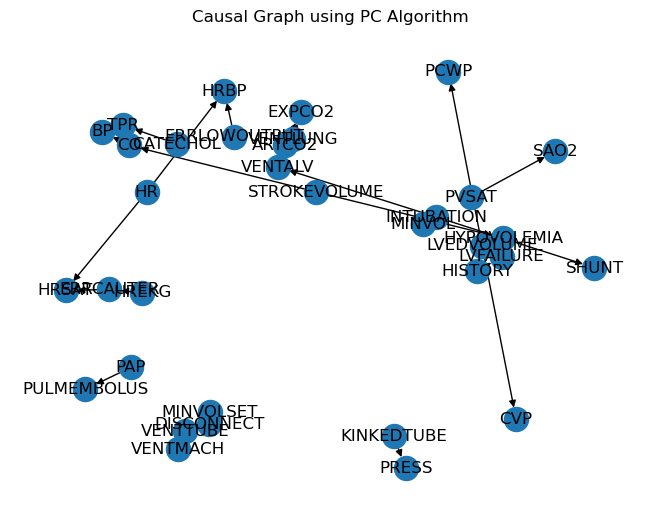

In [40]:
from pgmpy.utils import get_example_model
from pgmpy.estimators import PC

model = get_example_model('alarm')
data = model.simulate(n_samples=1000)

est = PC(data)
model_chi = est.estimate(ci_test='chi_square')
print(len(model_chi.edges()))
model_gsq, _ = est.estimate(ci_test='g_sq', return_type='skeleton')
print(len(model_gsq.edges()))

# Visualize the resulting causal graph
import networkx as nx
import matplotlib.pyplot as plt

nx_graph = nx.DiGraph(model_chi.edges())
nx.draw(nx_graph, with_labels=True)
plt.title("Causal Graph using PC Algorithm")
plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

[('A', 'C'), ('A', 'D'), ('B', 'C'), ('D', 'A')]
['A', 'C', 'B', 'D']


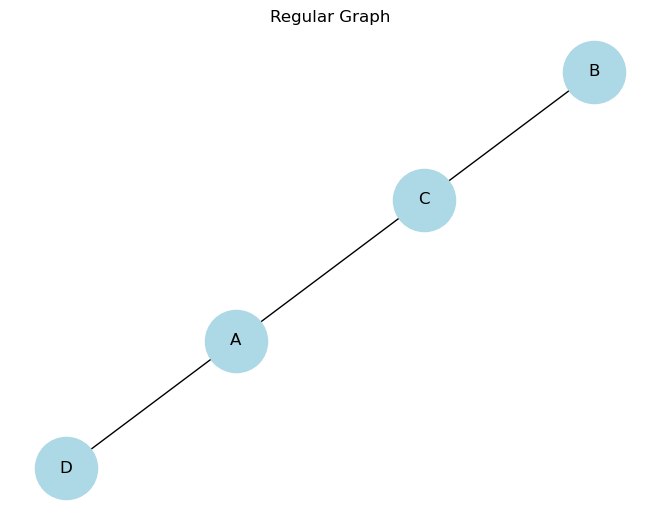

  0%|          | 0/5 [00:00<?, ?it/s]

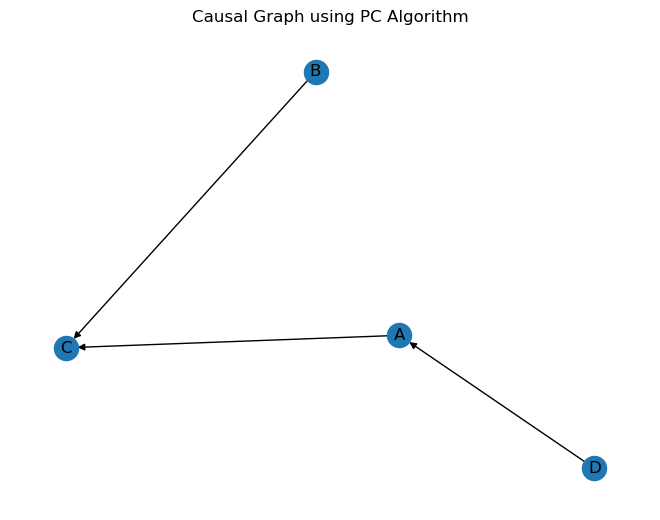

In [35]:
import pandas as pd
import numpy as np
from pgmpy.estimators import PC

data = pd.DataFrame(np.random.randint(0, 4, size=(5000, 3)), columns=list('ABD'))
data['C'] = data['A'] - data['B']
data['D'] += data['A']
c = PC(data)
pdag = c.skeleton_to_pdag(*c.build_skeleton())
print(pdag.edges()) # edges: A->C, B->C, A--D (not directed)
print(pdag.nodes())

# Visualize the resulting causal graph
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(pdag.nodes())
G.add_edges_from(pdag.edges())

nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
plt.title("Regular Graph")
plt.show()

est = PC(data)
model_chi = est.estimate(ci_test='chi_square')
nx_graph = nx.DiGraph(model_chi.edges())
nx.draw(nx_graph, with_labels=True)
plt.title("Causal Graph using PC Algorithm")
plt.show()


     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

  0%|          | 0/5 [00:00<?, ?it/s]

1


  0%|          | 0/5 [00:00<?, ?it/s]

0


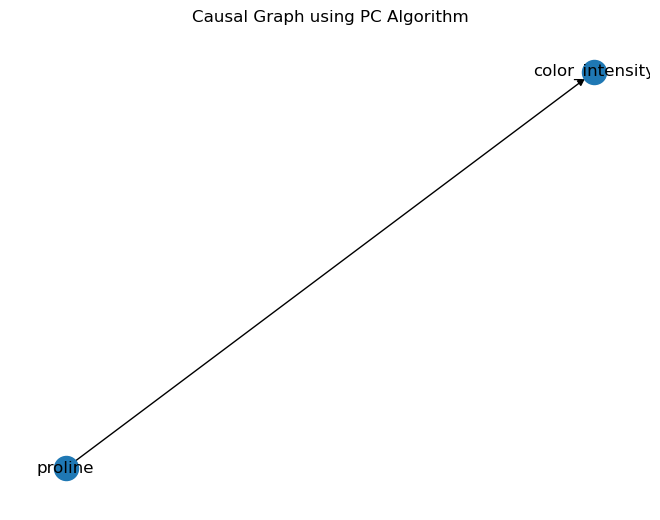

In [46]:
from sklearn import datasets

raw_data = datasets.load_wine()
wine = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
  
est = PC(wine)
model_chi = est.estimate(ci_test='chi_square')
print(len(model_chi.edges()))
model_gsq, _ = est.estimate(ci_test='g_sq', return_type='skeleton')
print(len(model_gsq.edges()))

# Visualize the resulting causal graph
import networkx as nx
import matplotlib.pyplot as plt

nx_graph = nx.DiGraph(model_chi.edges())
nx.draw(nx_graph, with_labels=True)
plt.title("Causal Graph using PC Algorithm")
plt.show()


  0%|          | 0/5 [00:00<?, ?it/s]

26


  0%|          | 0/5 [00:00<?, ?it/s]

5


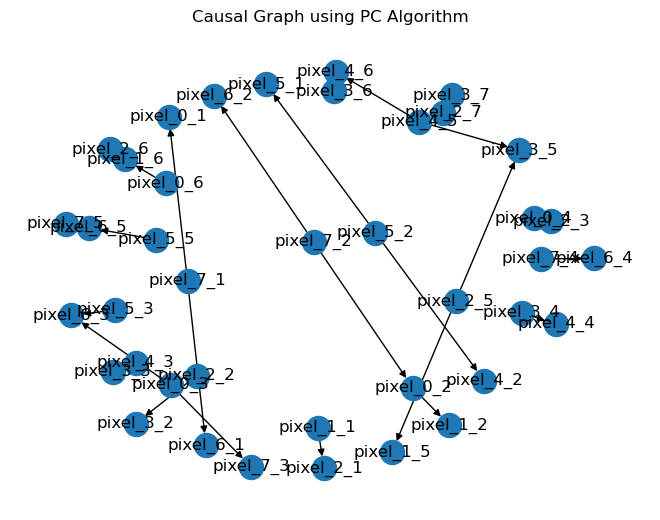

In [50]:
from sklearn import datasets

#raw_data = datasets.load_breast_cancer()
#raw_data = datasets.load_wine()
raw_data = datasets.load_digits()
wine = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
  
est = PC(wine)
model_chi = est.estimate(ci_test='chi_square')
print(len(model_chi.edges()))
model_gsq, _ = est.estimate(ci_test='g_sq', return_type='skeleton')
print(len(model_gsq.edges()))

# Visualize the resulting causal graph
import networkx as nx
import matplotlib.pyplot as plt

nx_graph = nx.DiGraph(model_chi.edges())
nx.draw(nx_graph, with_labels=True)
plt.title("Causal Graph using PC Algorithm")
plt.show()